In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data
temp = pd.read_csv(r'C:\Users\ungdu\Downloads\stl_temp.csv', skiprows=4, infer_datetime_format=True)
print(temp.head())


     Date  Value  Anomaly
0  193804   56.5      0.3
1  193805   64.7     -1.4
2  193806   73.5     -1.8
3  193807   80.4      1.0
4  193808   81.3      3.6


C:\Users\ungdu\AppData\Local\Temp\ipykernel_7012\1199043342.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temp = pd.read_csv(r'C:\Users\ungdu\Downloads\stl_temp.csv', skiprows=4, infer_datetime_format=True)


In [2]:
# Recall that missing value is set to -99.0 so isna().sum() will not help in this case
print(temp.isna().sum())

Date       0
Value      0
Anomaly    0
dtype: int64


In [3]:
# Query to find missing value assigned to -99.0, determine the index position
Index_position = temp.query('Value == -99.0').index.tolist()
print(Index_position)

[899]


In [4]:
# Inspect surrounding values
print(temp['Value'].loc[898])
print(temp['Value'].loc[900])

35.5
55.3


In [5]:
# Calculate new value by taking the mean of the surrounding values
new_val = (temp['Value'].loc[898] + temp['Value'].loc[900]) / 2
print(new_val)

45.4


In [6]:
# Assign NaN to the missing value using numpy
temp.at[899, 'Value'] = np.nan
print(temp['Value'].loc[899])

nan


In [7]:
# Check for NaN
print(temp.isna().sum())

Date       0
Value      1
Anomaly    0
dtype: int64


In [8]:
# Interpolate to fill NaN values
temp = temp.interpolate(method='linear', limit_direction='forward')
print(temp['Value'].loc[899])

45.4


In [9]:
# Convert to datetime format
temp['Date'] = pd.to_datetime(temp['Date'], format='%Y%m')

In [10]:
# Set the index as Date column
temp.set_index('Date', inplace=True)
print(temp.head())

            Value  Anomaly
Date                      
1938-04-01   56.5      0.3
1938-05-01   64.7     -1.4
1938-06-01   73.5     -1.8
1938-07-01   80.4      1.0
1938-08-01   81.3      3.6


In [11]:
# Provide the descriptive (summary) statistics
print(temp.describe())

            Value     Anomaly
count  970.000000  970.000000
mean    56.449588    0.291856
std     17.538847    5.972663
min     13.800000 -143.200000
25%     40.500000   -1.800000
50%     58.250000    0.500000
75%     73.200000    2.900000
max     87.900000   16.800000


In [12]:
# Subset out the column of interest
temp = temp[['Value']]
print(temp.head())

            Value
Date             
1938-04-01   56.5
1938-05-01   64.7
1938-06-01   73.5
1938-07-01   80.4
1938-08-01   81.3


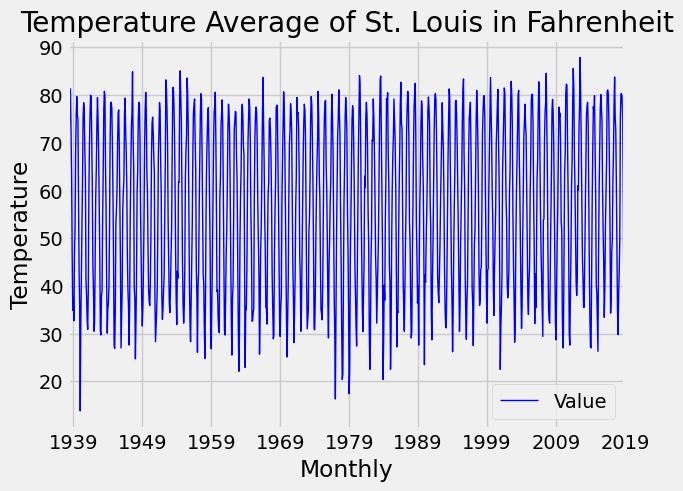

In [13]:

# Plot the time series for Temperature
plt.style.use('fivethirtyeight')
ax = temp.plot(color='blue', grid=True, linewidth=1)
ax.set_xlabel('Monthly')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Average of St. Louis in Fahrenheit')
plt.show()

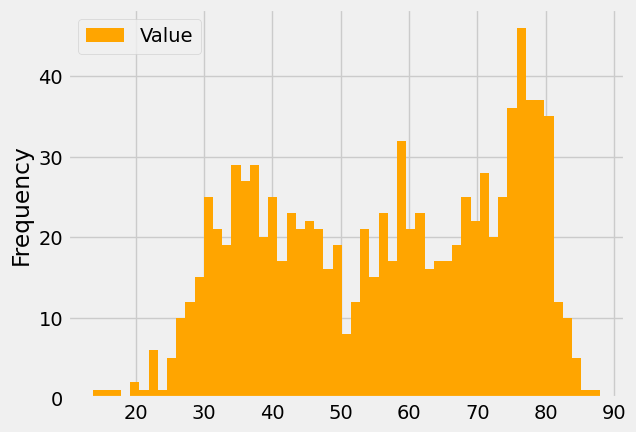

In [14]:
# Plot histogram (frequency of counts), change num of bins to see different plots
temp.plot(kind='hist', bins=55, color='orange', grid=True)
plt.show()

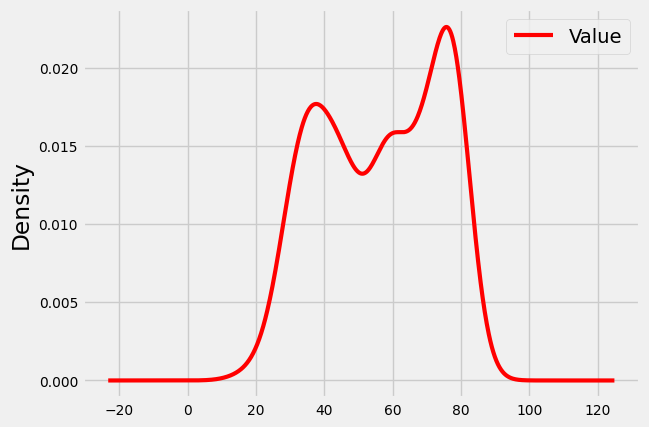

In [15]:
# Calculate kernel density plot
temp.plot(kind='density', color='red', grid=True, linewidth=3, fontsize=10)
plt.show()

In [16]:
# Saving the dataframe
temp.to_csv('df_temp.csv')